In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("50_Startups.csv")
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('&','')
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


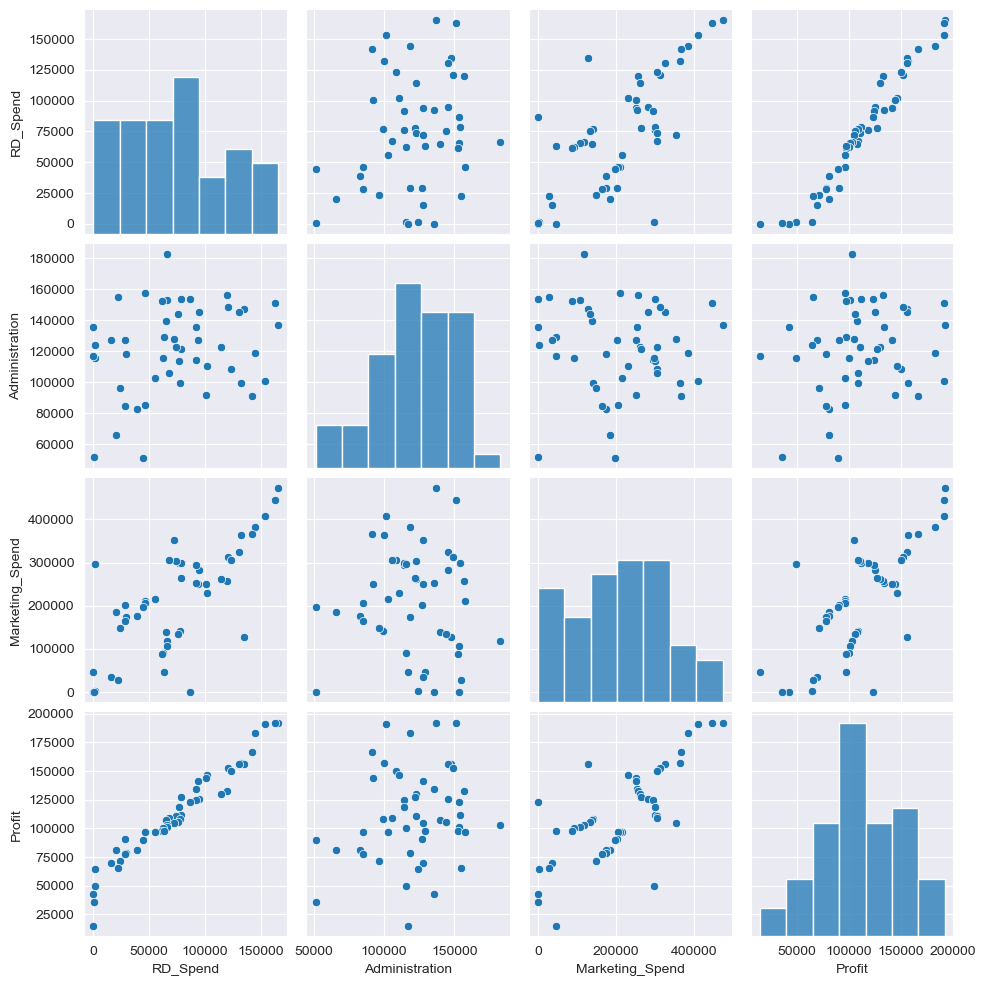

In [6]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [7]:
model = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend", data=data).fit()
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [8]:
print(model.tvalues, "\n", round(model.pvalues,4))

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          0.0000
RD_Spend           0.0000
Administration     0.6018
Marketing_Spend    0.1047
dtype: float64


In [9]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [10]:
ml_r = smf.ols("Profit~RD_Spend",data=data).fit()
print(ml_r.tvalues, "\n", round(ml_r.pvalues,4))

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    0.0
RD_Spend     0.0
dtype: float64


In [11]:
ml_a = smf.ols("Profit~Administration",data=data).fit()
print(ml_a.tvalues, "\n", round(ml_a.pvalues,4))

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.0038
Administration    0.1622
dtype: float64


In [12]:
ml_m = smf.ols("Profit~Marketing_Spend",data=data).fit()
print(ml_m.tvalues, "\n", round(ml_m.pvalues,4))

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          0.0
Marketing_Spend    0.0
dtype: float64


In [13]:
ml_am = smf.ols("Profit~Administration+Marketing_Spend",data=data).fit()
print(ml_am.tvalues, "\n", round(ml_am.pvalues))

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          0.0
Administration     0.0
Marketing_Spend    0.0
dtype: float64


In [14]:
ml_rm = smf.ols("Profit~RD_Spend+Marketing_Spend",data=data).fit()
print(ml_rm.tvalues, "\n", round(ml_rm.pvalues))

Intercept          17.463582
RD_Spend           19.265555
Marketing_Spend     1.927052
dtype: float64 
 Intercept          0.0
RD_Spend           0.0
Marketing_Spend    0.0
dtype: float64


In [15]:
ml_ra = smf.ols("Profit~RD_Spend+Administration",data=data).fit()
print(ml_ra.tvalues, "\n", round(ml_ra.pvalues))

Intercept          9.122352
RD_Spend          28.588870
Administration    -1.072677
dtype: float64 
 Intercept         0.0
RD_Spend          0.0
Administration    0.0
dtype: float64


# Calculating VIF

In [16]:
rsq_r = smf.ols("RD_Spend~Administration+Marketing_Spend", data=data).fit().rsquared
vif_r = 1/(1-rsq_r)
vif_r

2.4689030699947017

In [17]:
rsq_a = smf.ols("Administration~RD_Spend+Marketing_Spend", data=data).fit().rsquared
vif_a = 1/(1-rsq_a)
vif_a

1.1750910070550453

In [18]:
rsq_m = smf.ols("Marketing_Spend~Administration+RD_Spend", data=data).fit().rsquared
vif_m = 1/(1-rsq_m)
vif_m

2.3267732905308773

# Residual Analysis

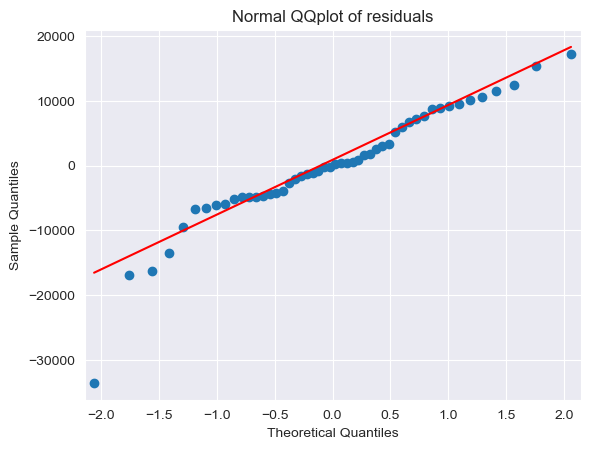

In [19]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line="q")
plt.title("Normal QQplot of residuals")
plt.show()

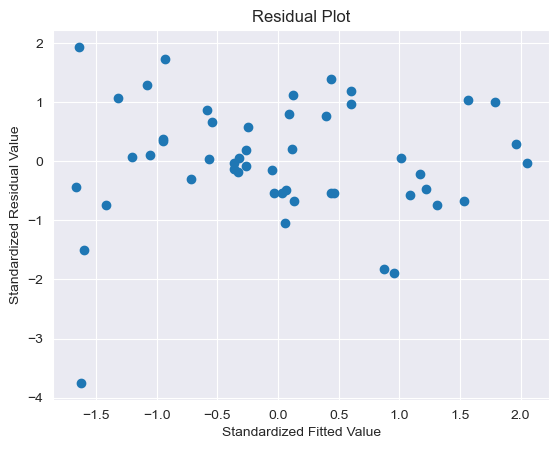

In [20]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Value")
plt.ylabel("Standardized Residual Value")
plt.show()

eval_env: 1


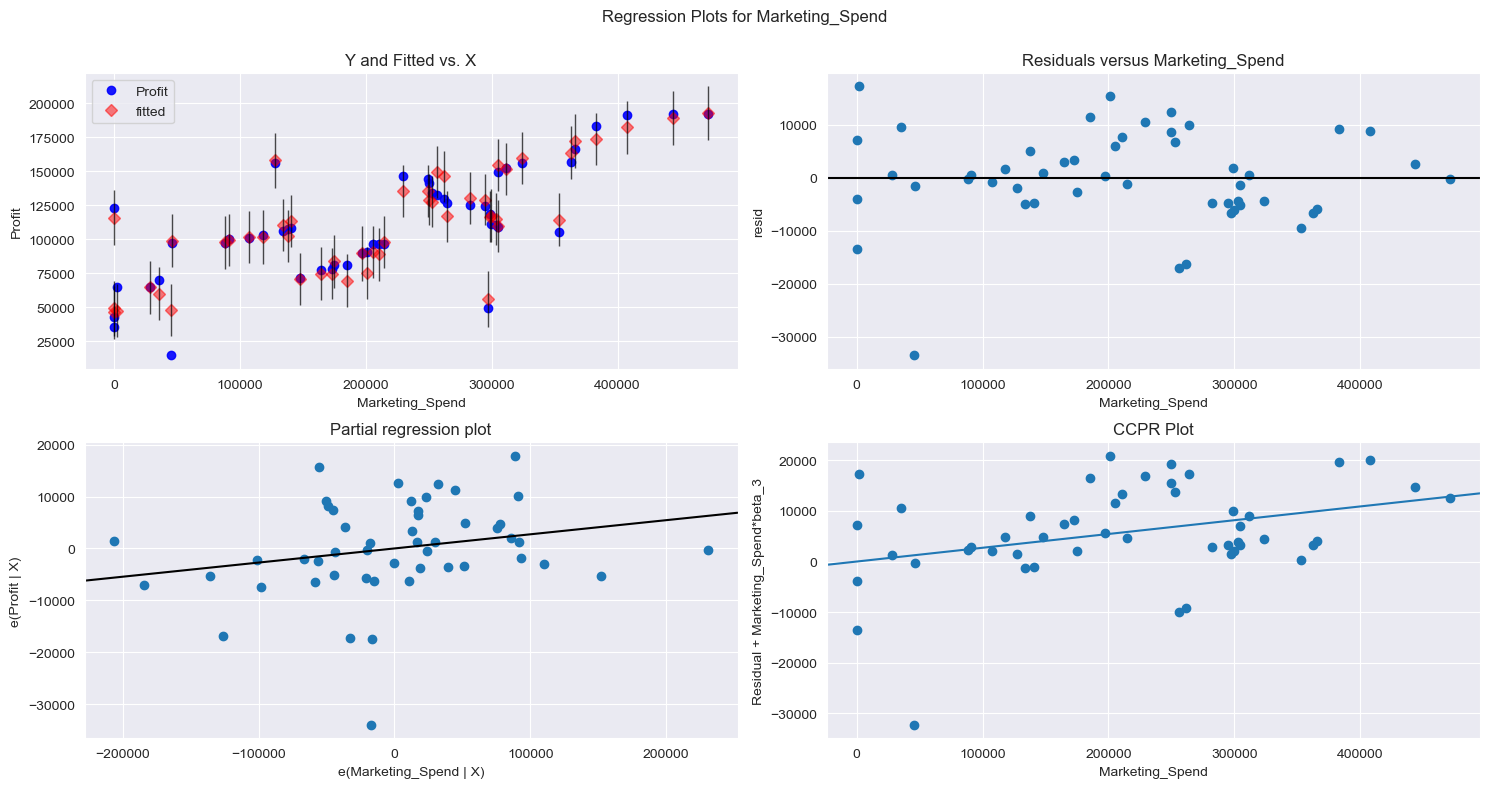

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

In [22]:
# Cook's distance

In [23]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

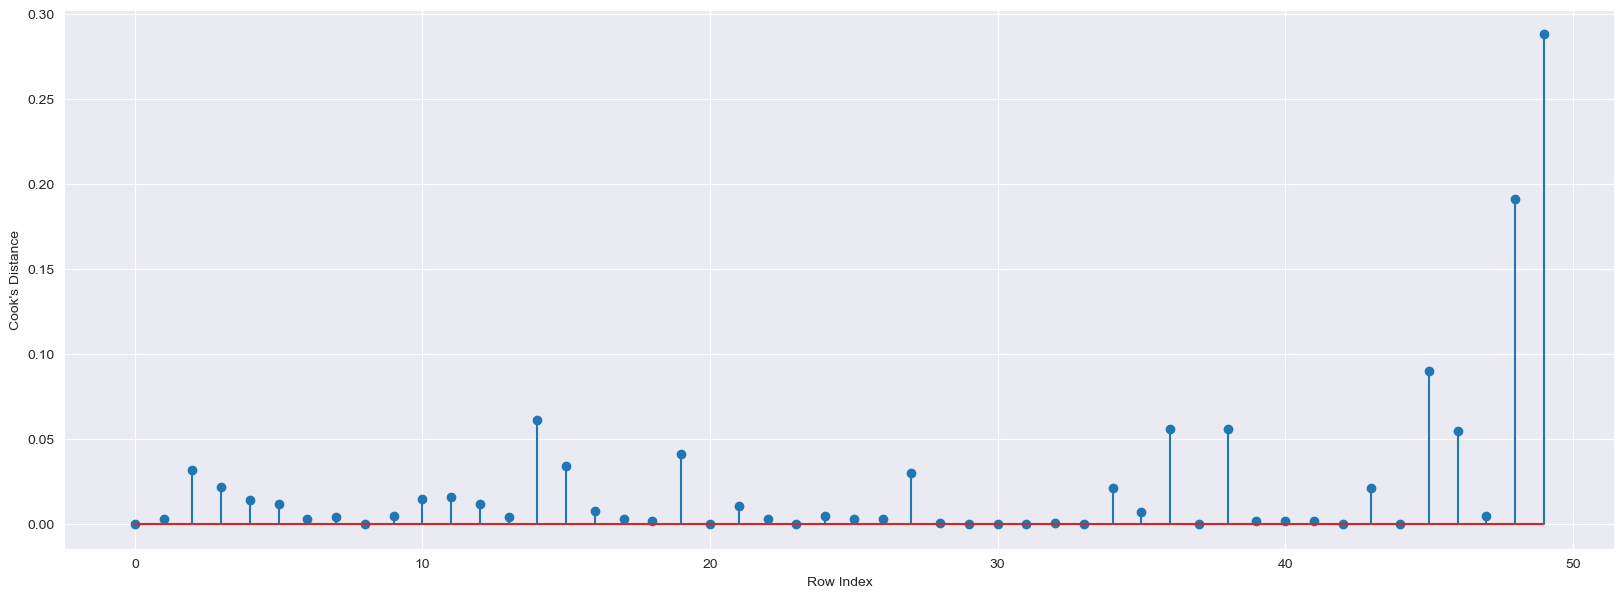

In [24]:
# plot the influencer values using stem plot
fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [25]:
(np.argmax(c), np.max(c))

(49, 0.28808229275432623)

In [26]:
k = 4
n = data.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [27]:
data[data.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [28]:
data = data.drop(data.index[[49]], axis = 0).reset_index(drop=True)
data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Improved Model

In [29]:
data_new = pd.read_csv("50_Startups.csv")
data_new.columns = data.columns.str.replace(' ','_')
data_new.columns = data.columns.str.replace('&','')
data_new.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
final_nl_v = smf.ols("Profit~RD_Spend+Marketing_Spend", data=data_new).fit()
(final_nl_v.rsquared, final_nl_v.aic, final_nl_v.bic)

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

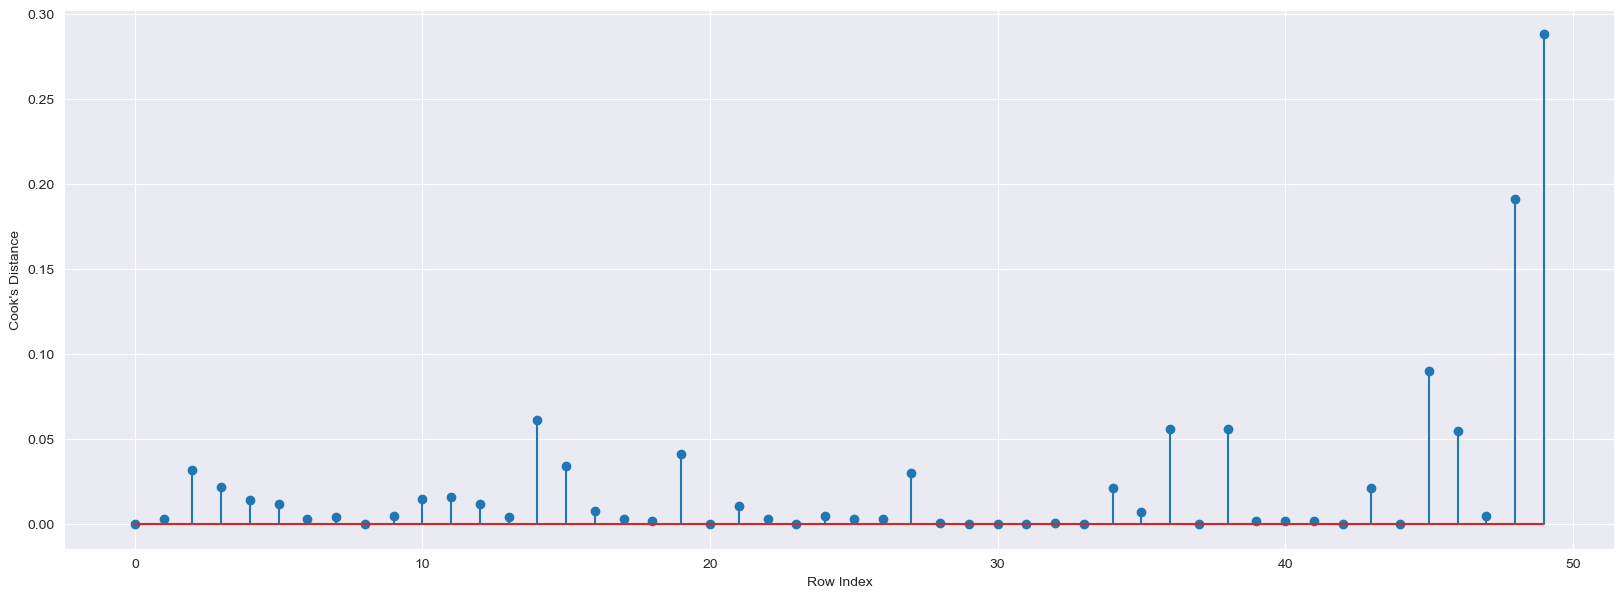

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(data_new)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

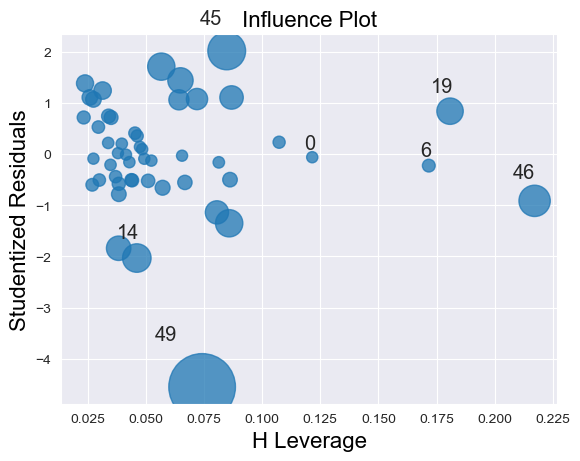

In [32]:
#High influence plot
influence_plot(final_nl_v)
plt.show()

In [33]:
k = 4
n = data_new.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff

0.30000000000000004

# Improving the model

In [34]:
while np.max(c)>0.5:
    model = smf.ols("Profit~RD_Spend+Marketing_Spend+Administration",data=data).fit()
    (c,_)=model.get_influence.cook_distance
    c
    np.argmax(c), np.max(c)
    data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data
else:
    final_model=smf.ols("Profit~RD_Spend+Marketing_Spend+Administration",data=data).fit()
    final_model.rsquared, final_model.aic
    print("The accuracy is improved to ", final_model.rsquared)

The accuracy is improved to  0.9613162435129847


In [36]:
data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Prediction

In [38]:
#new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
#final_model.predict(new_data)

In [39]:
pred_y = final_model.predict(data)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table Containing R^2 Value for each prepared model

In [40]:
d2 = {"Prep_Models": ["Model","Final_Model"], "Rsquared": [model.rsquared, final_model.rsquared]}
table = pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
